In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-3.752990,-2.536441,-0.896189,3.737792,-1.440868,0
1,-0.367972,2.330441,0.205848,0.092654,0.494331,1
2,-0.863835,1.912304,1.136871,0.218376,-0.546452,1
3,-0.703235,-0.513244,0.983769,0.928611,-0.478659,0
4,0.377422,-0.882816,2.001425,-0.693514,0.095205,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [8]:
# function for feature sampling
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [9]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [10]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_3144\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [11]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_3144\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [12]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_3144\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [13]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col3', 'target'], dtype='object')
Index(['col5', 'col2', 'target'], dtype='object')
Index(['col3', 'col2', 'target'], dtype='object')


In [14]:
df3

,col3,col2,target
84,0.561089,0.542431,1
34,0.088868,0.497659,1
74,1.164668,-2.804835,0
30,-2.164865,-0.601857,1
97,1.431150,-0.580186,0
53,-0.866876,-0.251487,1
5,0.822385,1.077124,0
5,0.822385,1.077124,0
47,1.051531,1.507747,1
19,-2.138345,0.687104,1


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [16]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [17]:
from sklearn.tree import plot_tree

[Text(0.3, 0.9285714285714286, 'x[1] <= -0.461\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.2, 0.7857142857142857, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.4, 0.7857142857142857, 'x[0] <= -1.005\ngini = 0.271\nsamples = 31\nvalue = [26, 5]'),
 Text(0.3, 0.6428571428571429, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.5, 0.6428571428571429, 'x[0] <= -0.352\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.3, 0.5, 'x[1] <= 1.716\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.2, 0.35714285714285715, 'x[0] <= -0.852\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.1, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.21428571428571427, 'x[0] <= -0.38\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 

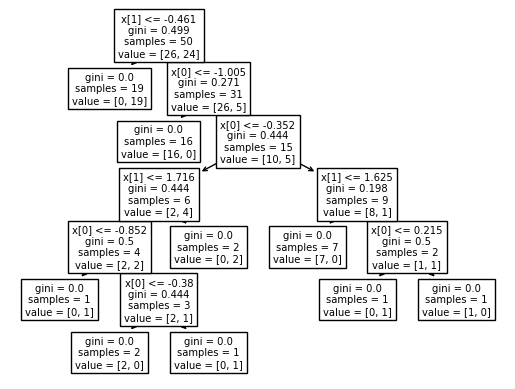

In [18]:
plot_tree(clf1)

[Text(0.5, 0.9285714285714286, 'x[1] <= -0.862\ngini = 0.487\nsamples = 50\nvalue = [21.0, 29.0]'),
 Text(0.4, 0.7857142857142857, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.6, 0.7857142857142857, 'x[1] <= 0.386\ngini = 0.339\nsamples = 37\nvalue = [8, 29]'),
 Text(0.4, 0.6428571428571429, 'x[0] <= -1.754\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.3, 0.5, 'x[0] <= -3.066\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2, 0.35714285714285715, 'x[1] <= -0.633\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8, 0.6428571428571429, 'x[0] <= -1.162\ngini = 0.147\nsamples = 25\nvalue = [2, 23]'),
 Text(0.7, 0.5, 'x[0] <= -1.196\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(

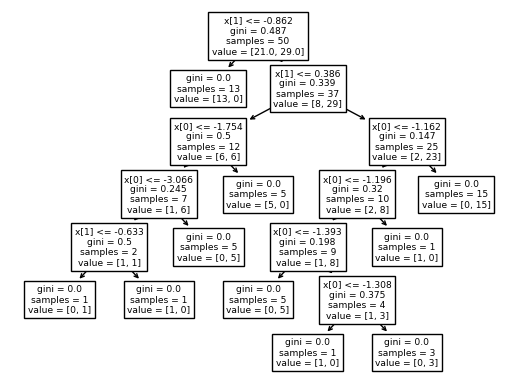

In [19]:
plot_tree(clf2)

[Text(0.45454545454545453, 0.9, 'x[1] <= -0.337\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.18181818181818182, 0.7, 'x[0] <= -1.18\ngini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2727272727272727, 0.5, 'x[1] <= -0.917\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.18181818181818182, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.36363636363636365, 0.3, 'x[1] <= -0.731\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2727272727272727, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.45454545454545453, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7272727272727273, 0.7, 'x[0] <= 0.581\ngini = 0.285\nsamples = 29\nvalue = [5, 24]'),
 Text(0.6363636363636364, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.8181818181818182, 0.5, 'x[0] <= 0.937\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.7272727272727273, 0.3, 'x[1] <= 1.648\ngin

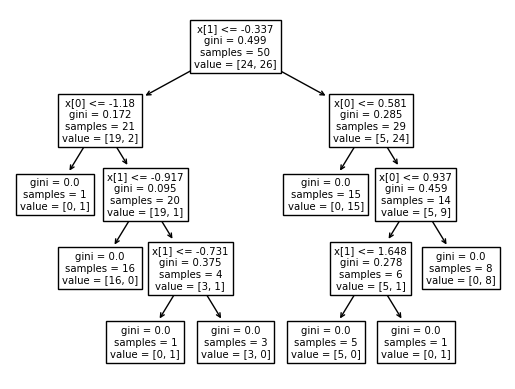

In [20]:
plot_tree(clf3)

In [21]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [22]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [23]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\DESKTOP\anaconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])